# Importar dependências

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

# Carregar dados

In [ ]:
df = pd.read_csv('brca_mirnaseq.csv', sep=';', header=0, decimal=',')
df.head()
df.info()
df
df.shape

(842, 898)

# Análise exploratória

In [ ]:
ax = sns.countplot(x="class", data=df)
df["class"].value_counts()
df["class"].value_counts(normalize=True)
df.describe()

,hsa.let.7a.1,hsa.let.7a.2,hsa.let.7a.3,hsa.let.7b,hsa.let.7c,hsa.let.7d,hsa.let.7e,hsa.let.7f.1,hsa.let.7f.2,hsa.let.7g,...,hsa.mir.940,hsa.mir.941.1,hsa.mir.942,hsa.mir.943,hsa.mir.944,hsa.mir.95,hsa.mir.96,hsa.mir.98,hsa.mir.99a,hsa.mir.99b
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,...,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,9218.938921,18432.504585,9289.250466,26606.604836,3152.699471,558.321269,1289.570177,24.359962,8687.461926,610.223836,...,5.902975,0.003737,6.446279,0.061018,2.320737,3.150482,38.307053,63.746405,1034.572148,44369.112203
std,4843.796136,9704.187427,4858.691217,16745.347957,3238.003201,346.883205,763.056055,12.490091,6052.615278,317.854963,...,8.325681,0.049274,9.541682,0.172214,6.527536,4.287594,33.791795,40.145314,1117.491608,32754.290751
min,1294.149164,2599.981125,1319.952907,1817.920354,148.795934,79.783216,161.181457,2.439034,653.474578,88.614573,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.374223,18.400719,3475.079227
25%,5902.143848,11741.467528,5933.706564,14580.357100,1276.700850,330.638301,809.867504,16.441786,4648.822942,410.859815,...,1.378098,0.000000,2.464140,0.000000,0.373238,1.201951,14.906921,39.913493,387.430475,22769.094433
50%,8016.628565,16040.589880,8103.783439,23097.825936,2352.902327,481.342371,1101.403395,21.890340,7019.157941,532.277053,...,3.192098,0.000000,4.127957,0.000000,1.036215,2.235731,29.634884,52.993693,710.026124,35594.670263
75%,11236.887034,22538.594950,11289.595988,34373.185504,3971.192192,681.931022,1619.864372,29.395515,10926.448322,724.277709,...,7.159431,0.000000,7.551755,0.000000,2.345941,4.030888,51.258145,75.993914,1242.434228,53462.034662
max,45101.697434,90233.655610,45095.490102,144706.427973,59677.212349,3370.036117,11617.011618,121.408006,80780.055188,3342.745045,...,91.996543,0.909391,184.185656,1.757516,122.685820,93.402785,259.127121,399.078716,15689.499524,248074.178531


# Baseline

In [ ]:
x = df.drop("class", axis=1)
y = df["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

lrc = LogisticRegression(random_state=42)
cv_list_lr_baseline = cross_val_score(lrc, x_train, y_train, cv=10, scoring='balanced_accuracy')

mean_cv_lr_baseline = np.mean(cv_list_lr_baseline)
std_cv_lr_baseline = np.std(cv_list_lr_baseline)
print(f"Preformance (bac): {round(mean_cv_lr_baseline, 4)} +- {round(std_cv_lr_baseline, 4)}")

Preformance (bac): 0.9201 +- 0.046


# Modelagem

In [ ]:
knn = Pipeline(
    [
        ('mms', MinMaxScaler()),
        ('skb', SelectKBest(chi2, k=10)),
        ('knn', KNeighborsClassifier(
            n_neighbors=3,
            weights='uniform',
            p=2
        ))
    ]
)

In [ ]:
cv_list_knn_euclid = cross_val_score(knn, x_train, y_train, cv=10, scoring='balanced_accuracy')
mean_cv_knn_euclid = np.mean(cv_list_knn_euclid)
std_cv_knn_euclid = np.std(cv_list_knn_euclid)
print(f"Preformance (bac): {round(mean_cv_knn_euclid, 4)} +- {round(std_cv_knn_euclid, 4)}")

Preformance (bac): 0.9703 +- 0.0377


In [ ]:
knn = Pipeline(
    [
        ('mms', MinMaxScaler()),
        ('skb', SelectKBest(chi2, k=10)),
        ('knn', KNeighborsClassifier(
            n_neighbors=3,
            weights='uniform',
            p=1
        ))
    ]
)

In [ ]:
cv_list_knn_man = cross_val_score(knn, x_train, y_train, cv=10, scoring='balanced_accuracy')
mean_cv_knn_man = np.mean(cv_list_knn_man)
std_cv_knn_man = np.std(cv_list_knn_man)
print(f"Preformance (bac): {round(mean_cv_knn_man, 4)} +- {round(std_cv_knn_man, 4)}")

Preformance (bac): 0.9638 +- 0.0407


In [ ]:
lr = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(
            random_state=42,
            class_weight='balanced',
            C=1,
            fit_intercept=True,
            penalty='l2'
        ))
    ]
)

In [ ]:
cv_list_lr_l2 = cross_val_score(lr, x_train, y_train, cv=10, scoring='balanced_accuracy')
mean_cv_lr_l2 = np.mean(cv_list_lr_l2)
std_cv_lr_l2 = np.std(cv_list_lr_l2)
print(f"Preformance (bac): {round(mean_cv_lr_l2, 4)} +- {round(std_cv_lr_l2, 4)}")

Preformance (bac): 0.9655 +- 0.0391


In [ ]:
lr = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(
            random_state=42,
            class_weight='balanced',
            C=1,
            fit_intercept=True,
            penalty='l1',
            solver='liblinear'
        ))
    ]
)

In [ ]:
cv_list_lr_l1 = cross_val_score(lr, x_train, y_train, cv=10, scoring='balanced_accuracy')
mean_cv_lr_l1 = np.mean(cv_list_lr_l1)
std_cv_lr_l1 = np.std(cv_list_lr_l1)
print(f"Preformance (bac): {round(mean_cv_lr_l1, 4)} +- {round(std_cv_lr_l1, 4)}")

Preformance (bac): 0.9665 +- 0.0373


In [ ]:
lr = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('lr', LogisticRegression(
            random_state=42,
            class_weight='balanced',
            C=1,
            fit_intercept=True,
            penalty='l2'
        ))
    ]
)

In [ ]:
cv_list_lr_pca = cross_val_score(lr, x_train, y_train, cv=10, scoring='balanced_accuracy')
mean_cv_lr_pca = np.mean(cv_list_lr_pca)
std_cv_lr_pca = np.std(cv_list_lr_pca)
print(f"Preformance (bac): {round(mean_cv_lr_pca, 4)} +- {round(std_cv_lr_pca, 4)}")

Preformance (bac): 0.9822 +- 0.0228


# Avaliação experimental

In [ ]:
df_result_cv = pd.DataFrame(
    [cv_list_lr_baseline, cv_list_knn_euclid, cv_list_knn_euclid, cv_list_lr_l2, cv_list_lr_l1, cv_list_lr_pca],
    index=['baseline', 'KNN-euclid', 'KNN-man', 'LR-L2', 'LR-L1', 'LR-PCA']
).T
df_result_cv

,baseline,KNN-euclid,KNN-man,LR-L2,LR-L1,LR-PCA
0,0.907233,1.000000,1.000000,0.990566,0.990566,0.990566
1,0.990566,0.981132,0.981132,0.888365,0.981132,0.981132
2,0.971698,0.990566,0.990566,0.990566,0.990566,0.990566
3,0.907233,0.916667,0.916667,0.916667,0.907233,0.990566
4,0.907233,1.000000,1.000000,0.990566,1.000000,1.000000
5,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667
6,0.907233,0.907233,0.907233,0.981132,0.907233,0.990566
7,0.878931,0.990566,0.990566,0.990566,0.981132,0.981132
8,0.980769,1.000000,1.000000,0.990385,0.990385,0.980769
9,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_res = df_result_cv.stack().to_frame("balanced_accuracy")
df_res.index.rename(['fold', 'pipelines'], inplace=True)
df_res = df_res.reset_index()
df_res.head(12)

,fold,pipelines,balanced_accuracy
0,0,baseline,0.907233
1,0,KNN-euclid,1.000000
2,0,KNN-man,1.000000
3,0,LR-L2,0.990566
4,0,LR-L1,0.990566
5,0,LR-PCA,0.990566
6,1,baseline,0.990566
7,1,KNN-euclid,0.981132
8,1,KNN-man,0.981132
9,1,LR-L2,0.888365


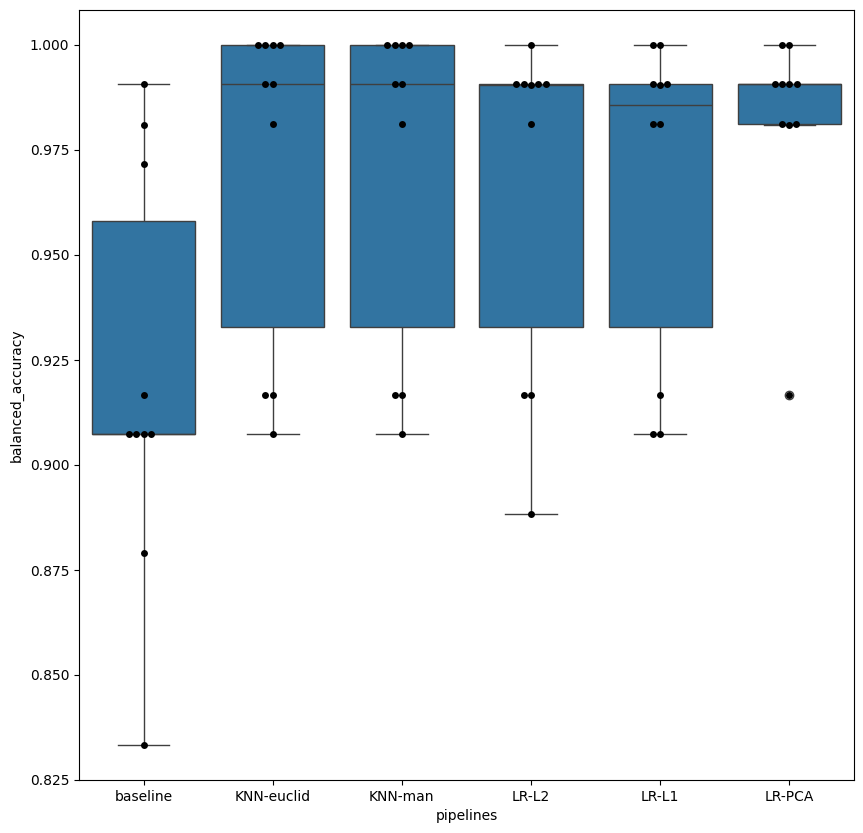

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='pipelines', y='balanced_accuracy', data=df_res)
ax = sns.swarmplot(x='pipelines', y='balanced_accuracy', data=df_res, color='black')

<Figure size 1000x1000 with 0 Axes>

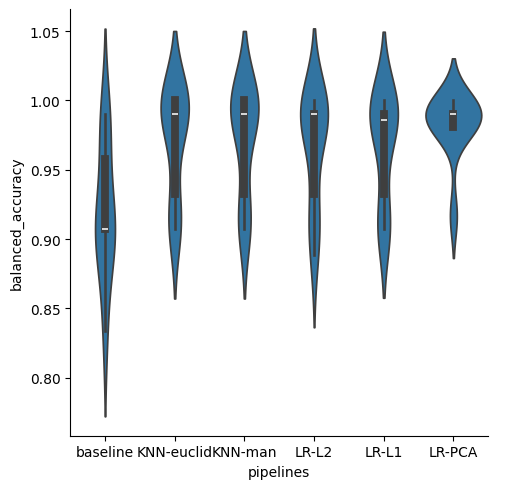

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.catplot(x='pipelines', y='balanced_accuracy', data=df_res, kind='violin')

# Avaliação de performance

In [ ]:
lr = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('lr', LogisticRegression(
            random_state=42,
            class_weight='balanced',
            C=1,
            fit_intercept=True,
            penalty='l2'
        ))
    ]
)

In [ ]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
lr_pca_test = balanced_accuracy_score(y_test, y_pred)
print(f"Preformance (bac): {round(lr_pca_test, 4)}")

Preformance (bac): 0.972


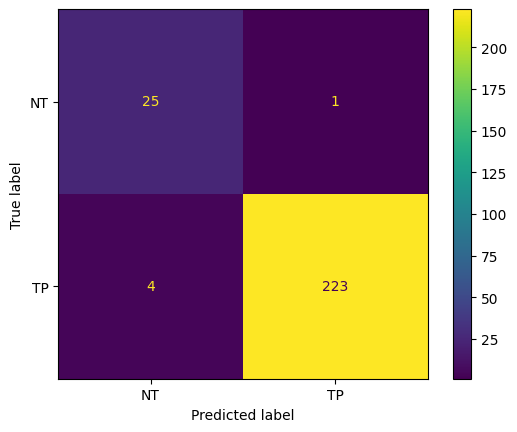

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)
plt.show()

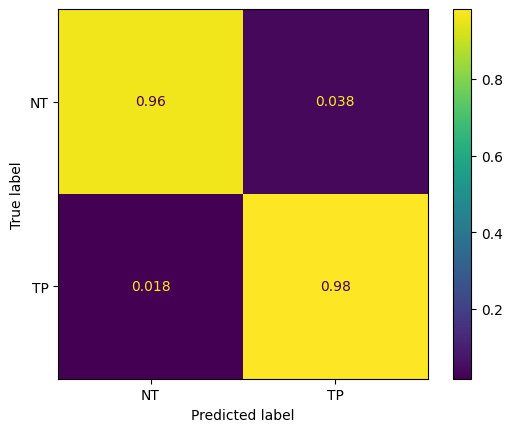

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test, normalize='true')
plt.show()

True,Predict
(errou) TP,NT: 4 (0.2%)
(acertou) TP,TP: 223 (98%)
(acertou) NT,NT: 25 (96%)
(errou) NT,TP: 1 (0,4%)

# Submissão de novos registros

In [ ]:
novo_dado = np.array([x_test.iloc[0].values])
predicted_class = lr.predict(novo_dado)
print(f"Previsão: {predicted_class[0]}")

predicted_probabilities = lr.predict_proba(novo_dado)
print(f"Probabilidades: {predicted_probabilities}")

Probabilidades: [[4.31228555e-04 9.99568771e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
